In [1]:
import pandas as pd
import xarray as xr
import seaborn as sns
import re
import numpy as np


In [2]:
# Define a function to convert time strings to numerical values
def convert_time_to_numeric(time_str):
    if pd.isna(time_str):
        return np.nan
    time_value = int(time_str[:-1])
    time_unit = time_str[-1]
    if time_unit == 'h':
        return time_value
    elif time_unit == 'd':
        return time_value * 24
    else:
        return np.nan
    
def extract_numbers_from_string_row1(s):
    pattern = r'(\d+\.?\d*) μM BaP \+ (\d+\.?\d*) μM CLO'
    match = re.search(pattern, s)
    if match:
        num1 = float(match.group(1))
        num2 = float(match.group(2))
        return num1, num2
    else:
        return None, None


def extract_trailing_number(s):
    match = re.search(r'exp (\d+)', s)
    if match:
        return int(match.group(1))
    else:
        return None

        # Example usage


In [3]:

#data_for_Anna = pd.read_excel('data_for_Anna_ddCt_Jan2025.xlsx')
data_for_Anna = pd.read_excel('data_for_Anna_ddCt_Jan2025.xlsx', sheet_name='ddCt')
data_for_Anna.columns = ['time', 'varname', 'well'] + list(data_for_Anna.columns[3:])

data_for_Anna['time_numeric'] = data_for_Anna['time'].apply(convert_time_to_numeric)
# Reorder columns to put 'time_numeric' as the first column
cols = ['time_numeric'] + [col for col in data_for_Anna if col != 'time_numeric']
data_for_Anna = data_for_Anna[cols]
data_for_Anna


,time_numeric,time,varname,well,ddCt,ddCt.1,ddCt.2,ddCt.3,ddCt.4,ddCt.5,...,2^-ddCt,2^-ddCt.1,2^-ddCt.2,2^-ddCt.3,2^-ddCt.4,2^-ddCt.5,2^-ddCt.6,2^-ddCt.7,2^-ddCt.8,2^-ddCt.9
0,NaN,NaN,NaN,NaN,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 5 μM CLO,0.01 μM BaP + 5 μM CLO,...,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 5 μM CLO,0.01 μM BaP + 5 μM CLO,0.01 μM BaP + 5 μM CLO,0.05 μM BaP + 1 μM CLO,0.05 μM BaP + 1 μM CLO,0.05 μM BaP + 1 μM CLO
1,NaN,NaN,NaN,well,exp 1,exp 2,exp 3,exp 4,exp 1,exp 2,...,exp 1,exp 2,exp 3,exp 4,exp 1,exp 2,exp 3,exp 1,exp 2,NaN
2,2.0,2h,DMSO,1,-0.560378,NaN,NaN,NaN,NaN,NaN,...,1.474655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2h,DMSO,2,0.26115,NaN,NaN,NaN,NaN,NaN,...,0.834423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2h,DMSO,3,-0.007775,NaN,NaN,NaN,NaN,NaN,...,1.005404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,72.0,72h,CLO,2,NaN,-1.58123,-2.92543,-1.446951,-3.099524,-0.160768,...,NaN,2.992249,7.597003,2.726312,8.571359,1.117882,73.70565,3.596822,4.192706,NaN
58,72.0,72h,CLO,3,NaN,-1.883178,-2.661773,-1.232881,-3.361568,-1.127421,...,NaN,3.688868,6.328101,2.350358,10.278569,2.184679,37.730051,3.180816,3.607092,NaN
59,72.0,72h,BaP+CLO,1,NaN,-4.557708,-3.800091,-4.686107,-9.551182,-9.00813,...,NaN,23.550855,13.929688,25.742978,750.226506,514.893486,3044.314509,242.802639,187.559946,NaN
60,72.0,72h,BaP+CLO,2,NaN,-4.817918,-3.798148,-3.986963,-8.971469,-9.575591,...,NaN,28.205765,13.910937,15.856069,501.974097,763.027414,1527.520907,256.340204,180.041016,NaN


In [7]:
vals = data_for_Anna.iloc[0].astype(str).apply(extract_numbers_from_string_row1)
exps=data_for_Anna.iloc[1].astype(str).apply(extract_trailing_number)


split_vals = vals.apply(pd.Series)
split_vals.columns = ['BaP', 'CLO']
split_vals.T

split_exps = exps.apply(pd.Series)
split_exps.columns=['Experiment']
# split_exps = split_exps.fillna(-1).astype(int)  # Fill NaN values with -1 before converting to int
merged_df = pd.concat([split_vals, split_exps], axis=1).dropna()
merged_df['Experiment'] = merged_df['Experiment'].astype(int)
merged_df = merged_df.rename_axis('col')
merged_df

,BaP,CLO,Experiment
col,,,
ddCt,0.01,1.0,1
ddCt.1,0.01,1.0,2
ddCt.2,0.01,1.0,3
ddCt.3,0.01,1.0,4
ddCt.4,0.01,5.0,1
ddCt.5,0.01,5.0,2
ddCt.6,0.01,5.0,3
ddCt.7,0.05,1.0,1
ddCt.8,0.05,1.0,2


In [8]:
BaPs = merged_df['BaP'].unique()
CLOs= merged_df['CLO'].unique()
Exps= merged_df['Experiment'].unique()

In [9]:
# Convert merged_df to an xarray Dataset
merged_xarray = xr.Dataset.from_dataframe(merged_df[0:9]).set_coords(['BaP', 'CLO', 'Experiment'])
merged_xarray = merged_xarray.rename({'BaP': 'BaP_coord', 'CLO': 'CLO_coord'})
merged_xarray

<xarray.Dataset> Size: 288B
Dimensions:     (col: 9)
Coordinates:
    BaP_coord   (col) float64 72B 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.05 0.05
    CLO_coord   (col) float64 72B 1.0 1.0 1.0 1.0 5.0 5.0 5.0 1.0 1.0
    Experiment  (col) int64 72B 1 2 3 4 1 2 3 1 2
  * col         (col) object 72B 'ddCt' 'ddCt.1' 'ddCt.2' ... 'ddCt.7' 'ddCt.8'
Data variables:
    *empty*

In [10]:
data_for_Anna

,time_numeric,time,varname,well,ddCt,ddCt.1,ddCt.2,ddCt.3,ddCt.4,ddCt.5,...,2^-ddCt,2^-ddCt.1,2^-ddCt.2,2^-ddCt.3,2^-ddCt.4,2^-ddCt.5,2^-ddCt.6,2^-ddCt.7,2^-ddCt.8,2^-ddCt.9
0,NaN,NaN,NaN,NaN,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 5 μM CLO,0.01 μM BaP + 5 μM CLO,...,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 1 μM CLO,0.01 μM BaP + 5 μM CLO,0.01 μM BaP + 5 μM CLO,0.01 μM BaP + 5 μM CLO,0.05 μM BaP + 1 μM CLO,0.05 μM BaP + 1 μM CLO,0.05 μM BaP + 1 μM CLO
1,NaN,NaN,NaN,well,exp 1,exp 2,exp 3,exp 4,exp 1,exp 2,...,exp 1,exp 2,exp 3,exp 4,exp 1,exp 2,exp 3,exp 1,exp 2,NaN
2,2.0,2h,DMSO,1,-0.560378,NaN,NaN,NaN,NaN,NaN,...,1.474655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2h,DMSO,2,0.26115,NaN,NaN,NaN,NaN,NaN,...,0.834423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2h,DMSO,3,-0.007775,NaN,NaN,NaN,NaN,NaN,...,1.005404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,72.0,72h,CLO,2,NaN,-1.58123,-2.92543,-1.446951,-3.099524,-0.160768,...,NaN,2.992249,7.597003,2.726312,8.571359,1.117882,73.70565,3.596822,4.192706,NaN
58,72.0,72h,CLO,3,NaN,-1.883178,-2.661773,-1.232881,-3.361568,-1.127421,...,NaN,3.688868,6.328101,2.350358,10.278569,2.184679,37.730051,3.180816,3.607092,NaN
59,72.0,72h,BaP+CLO,1,NaN,-4.557708,-3.800091,-4.686107,-9.551182,-9.00813,...,NaN,23.550855,13.929688,25.742978,750.226506,514.893486,3044.314509,242.802639,187.559946,NaN
60,72.0,72h,BaP+CLO,2,NaN,-4.817918,-3.798148,-3.986963,-8.971469,-9.575591,...,NaN,28.205765,13.910937,15.856069,501.974097,763.027414,1527.520907,256.340204,180.041016,NaN


In [11]:
data = data_for_Anna.drop([0, 1])
data.head()

,time_numeric,time,varname,well,ddCt,ddCt.1,ddCt.2,ddCt.3,ddCt.4,ddCt.5,...,2^-ddCt,2^-ddCt.1,2^-ddCt.2,2^-ddCt.3,2^-ddCt.4,2^-ddCt.5,2^-ddCt.6,2^-ddCt.7,2^-ddCt.8,2^-ddCt.9
2,2.0,2h,DMSO,1,-0.560378,NaN,NaN,NaN,NaN,NaN,...,1.474655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2h,DMSO,2,0.26115,NaN,NaN,NaN,NaN,NaN,...,0.834423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2h,DMSO,3,-0.007775,NaN,NaN,NaN,NaN,NaN,...,1.005404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,2h,BaP,1,-10.420152,-11.028003,-10.929129,-11.782777,-10.832814,-11.862717,...,1370.182249,2088.140191,1949.825209,3523.460903,1823.90338,3724.205429,5074.337572,9204.482504,6676.287673,NaN
6,2.0,2h,BaP,2,-10.787039,-10.49952,-11.209498,-10.953874,-10.904961,-12.309868,...,1766.941452,1447.672868,2368.073823,1983.556499,1917.434039,5077.377004,4821.410155,5765.009195,7633.449563,NaN


In [12]:

data['varname'].unique()

array(['DMSO', 'BaP', 'CLO', 'BaP+CLO'], dtype=object)

In [14]:
xdata=merged_xarray
xdata = xdata.assign_coords(time=data['time_numeric'].unique(), well=data['well'].unique().astype(int))
for varname in data['varname'].unique():
    print
    new_variable_data = np.full((len(xdata.col), len(xdata.well), len(xdata.time)), np.nan)
    xdata = xdata.assign({varname: (('col', 'well', 'time'), new_variable_data)})
xdata

<xarray.Dataset> Size: 5kB
Dimensions:     (col: 9, time: 5, well: 3)
Coordinates:
    BaP_coord   (col) float64 72B 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.05 0.05
    CLO_coord   (col) float64 72B 1.0 1.0 1.0 1.0 5.0 5.0 5.0 1.0 1.0
    Experiment  (col) int64 72B 1 2 3 4 1 2 3 1 2
  * col         (col) object 72B 'ddCt' 'ddCt.1' 'ddCt.2' ... 'ddCt.7' 'ddCt.8'
  * time        (time) float64 40B 2.0 6.0 24.0 48.0 72.0
  * well        (well) int64 24B 1 2 3
Data variables:
    DMSO        (col, well, time) float64 1kB nan nan nan nan ... nan nan nan
    BaP         (col, well, time) float64 1kB nan nan nan nan ... nan nan nan
    CLO         (col, well, time) float64 1kB nan nan nan nan ... nan nan nan
    BaP+CLO     (col, well, time) float64 1kB nan nan nan nan ... nan nan nan

In [17]:
cols = xdata.col.values
varnames = data['varname'].unique()



for col in cols:
    for varname in varnames:
        tmp = data[data['varname'] == varname].pivot_table(index='time_numeric', columns='well', values=col)
        tmp = tmp.reindex(columns=xdata.well.values, fill_value=np.nan)  # Align the well indices
        for well in tmp.columns:
            for time in tmp.index:
                xdata[varname].loc[dict(col=col, well=well, time=time)] = tmp.loc[time, well]

xdata

<xarray.Dataset> Size: 5kB
Dimensions:     (col: 9, time: 5, well: 3)
Coordinates:
    BaP_coord   (col) float64 72B 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.05 0.05
    CLO_coord   (col) float64 72B 1.0 1.0 1.0 1.0 5.0 5.0 5.0 1.0 1.0
    Experiment  (col) int64 72B 1 2 3 4 1 2 3 1 2
  * col         (col) object 72B 'ddCt' 'ddCt.1' 'ddCt.2' ... 'ddCt.7' 'ddCt.8'
  * time        (time) float64 40B 2.0 6.0 24.0 48.0 72.0
  * well        (well) int64 24B 1 2 3
Data variables:
    DMSO        (col, well, time) float64 1kB -0.5604 -0.8122 ... nan -0.3481
    BaP         (col, well, time) float64 1kB -10.42 -8.277 ... -4.735 -4.113
    CLO         (col, well, time) float64 1kB -0.5333 -0.8797 ... -1.284 -1.851
    BaP+CLO     (col, well, time) float64 1kB -10.97 -8.673 ... -7.859 -7.66

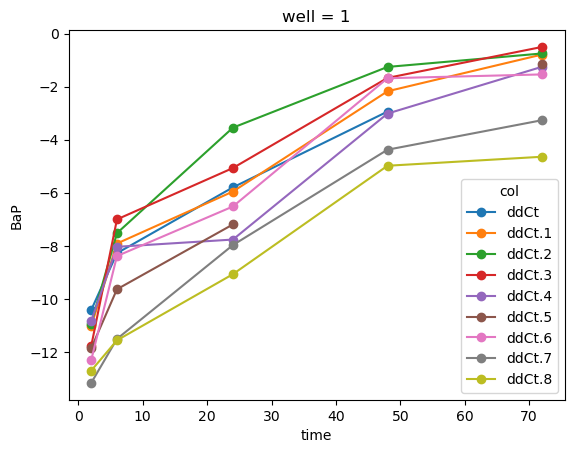

In [24]:
xdata.BaP.loc[dict(well=1)].plot.line(x='time', linestyle='-', marker='o');


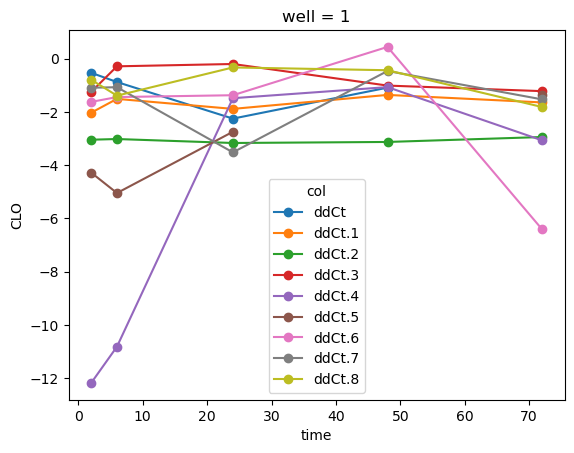

In [25]:
xdata.CLO.loc[dict(well=1)].plot.line(x='time', linestyle='-', marker='o');


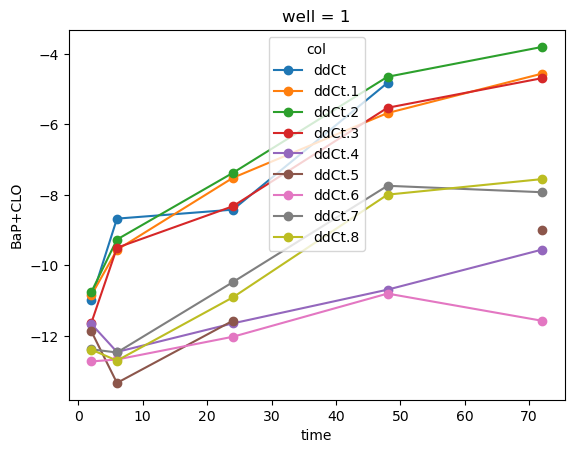

In [26]:
xdata['BaP+CLO'].loc[dict(well=1)].plot.line(x='time', linestyle='-', marker='o');


In [40]:
xdata['BaP_std']=xdata.BaP.std(dim='well')
xdata['BaP_mn']=xdata.CLO.mean(dim='well')

/Users/guttorm/anaconda3/envs/dyn_sys/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [41]:
xdata

<xarray.Dataset> Size: 5kB
Dimensions:     (col: 9, time: 5, well: 3)
Coordinates:
    BaP_coord   (col) float64 72B 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.05 0.05
    CLO_coord   (col) float64 72B 1.0 1.0 1.0 1.0 5.0 5.0 5.0 1.0 1.0
    Experiment  (col) int64 72B 1 2 3 4 1 2 3 1 2
  * col         (col) object 72B 'ddCt' 'ddCt.1' 'ddCt.2' ... 'ddCt.7' 'ddCt.8'
  * time        (time) float64 40B 2.0 6.0 24.0 48.0 72.0
  * well        (well) int64 24B 1 2 3
Data variables:
    DMSO        (col, well, time) float64 1kB -0.5604 -0.8122 ... nan -0.3481
    BaP         (col, well, time) float64 1kB -10.42 -8.277 ... -4.735 -4.113
    CLO         (col, well, time) float64 1kB -0.5333 -0.8797 ... -1.284 -1.851
    BaP+CLO     (col, well, time) float64 1kB -10.97 -8.673 ... -7.859 -7.66
    BaP_std     (col, time) float64 360B 0.1636 0.3583 0.1884 ... 0.1054 0.2161
    BaP_mn      (col, time) float64 360B -0.7083 -0.7086 ... -0.8214 -1.912

/Users/guttorm/anaconda3/envs/dyn_sys/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/guttorm/anaconda3/envs/dyn_sys/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


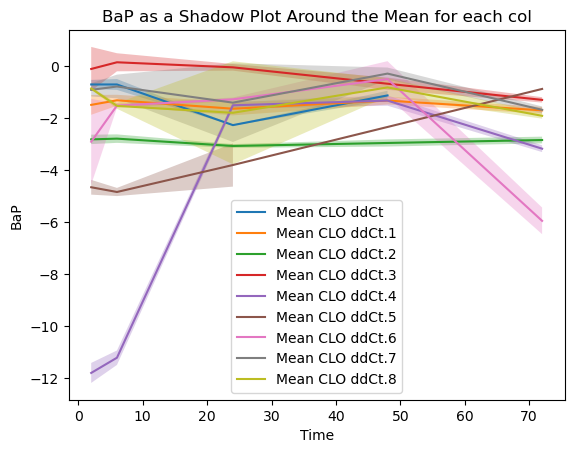

In [51]:
import matplotlib.pyplot as plt
for col in cols:
    col_data = xdata.CLO.sel(col=col)
    mean_data = col_data.mean(dim='well')
    std_data = col_data.std(dim='well')

    sns.lineplot(x=col_data.time, y=mean_data, label=f'Mean CLO {col}')
    plt.fill_between(col_data.time, mean_data - std_data, mean_data + std_data, alpha=0.3)

plt.xlabel('Time')
plt.ylabel('BaP')
plt.title('BaP as a Shadow Plot Around the Mean for each col')
plt.legend()
plt.show()

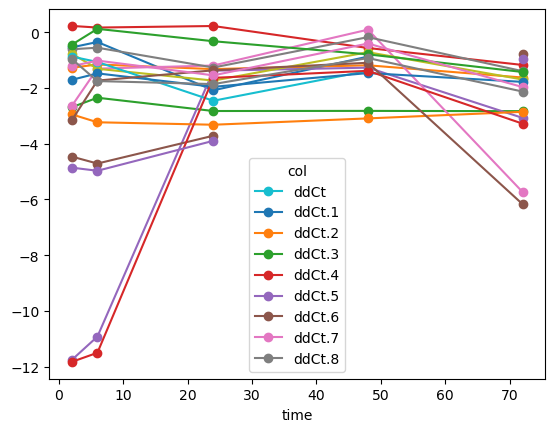

In [43]:
(xdata['BaP_std']+xdata['BaP_mn']).plot.line(x='time', linestyle='-', marker='o');
(xdata['BaP_mn']-xdata['BaP_std']).plot.line(x='time', linestyle='-', marker='o');
